# Мини-проект: анализ продаж.

In [5]:
# Задачи:

# Подготовка датасета.
# Слияние серии файлов в единый датафрейм.
# Найти клиентов, совершивших наибольшее количество покупок.
# Найти топ 10 проданных товаров (по количеству) и посторить barplot.
# Посчитать как много продано товаров с id = 56 (товаров с этим id, но проданных в разные дни).
# Построить график рапсределения продаж по дням.
# Найти количество клиентов, совершивших повторные покупки (товаров с одинаковым id, но купленных 
# в разные дни).
# Построить распределение продаж по дням и найти дни с минимальным и максимальным числом покупок.
# Найти сколько клиентов совершили повторные покупки в разные дни.

In [15]:
# Подготовка датасета:

import os
import pandas as pd
import seaborn as sns

path = 'c:/data'

os.listdir('c:/data/2020-12-03')

['Alexey_Smirnov',
 'Anton_Petrov',
 'Kirill_Petrov',
 'Petr_Fedorov',
 'Vasiliy_Ivanov',
 'Vasiliy_Petrov']

In [16]:
list(os.walk(path))

[('c:/data',
  ['2020-12-03',
   '2020-12-04',
   '2020-12-05',
   '2020-12-06',
   '2020-12-07',
   '2020-12-08',
   '2020-12-09'],
  []),
 ('c:/data\\2020-12-03',
  ['Alexey_Smirnov',
   'Anton_Petrov',
   'Kirill_Petrov',
   'Petr_Fedorov',
   'Vasiliy_Ivanov',
   'Vasiliy_Petrov'],
  []),
 ('c:/data\\2020-12-03\\Alexey_Smirnov', [], ['data.csv']),
 ('c:/data\\2020-12-03\\Anton_Petrov', [], ['data.csv']),
 ('c:/data\\2020-12-03\\Kirill_Petrov', [], ['data.csv']),
 ('c:/data\\2020-12-03\\Petr_Fedorov', [], ['data.csv']),
 ('c:/data\\2020-12-03\\Vasiliy_Ivanov', [], ['data.csv']),
 ('c:/data\\2020-12-03\\Vasiliy_Petrov', [], ['data.csv']),
 ('c:/data\\2020-12-04',
  ['Alexey_Smirnov',
   'Kirill_Fedorov',
   'Petr_Fedorov',
   'Petr_Ivanov',
   'Petr_Smirnov',
   'Rostislav_Fedorov',
   'Rostislav_Ivanov',
   'Rostislav_Smirnov',
   'Vasiliy_Ivanov'],
  []),
 ('c:/data\\2020-12-04\\Alexey_Smirnov', [], ['data.csv']),
 ('c:/data\\2020-12-04\\Kirill_Fedorov', [], ['data.csv']),
 ('c:/da

In [18]:
for trinity in os.walk(path +'/2020-12-05'):
    current_path = trinity[0]
    dirs = trinity[1]
    files = trinity[2]
    
    print(current_path, files)

c:/data/2020-12-05 []
c:/data/2020-12-05\Alexey_Fedorov ['data.csv']
c:/data/2020-12-05\Alexey_Petrov ['data.csv']
c:/data/2020-12-05\Kirill_Smirnov ['data.csv']
c:/data/2020-12-05\Petr_Ivanov ['data.csv']
c:/data/2020-12-05\Petr_Smirnov ['data.csv']
c:/data/2020-12-05\Rostislav_Smirnov ['data.csv']


In [17]:
for current_path, dirs, files in os.walk(path +'/2020-12-05'):
    print(current_path, dirs, files)

c:/data/2020-12-05 ['Alexey_Fedorov', 'Alexey_Petrov', 'Kirill_Smirnov', 'Petr_Ivanov', 'Petr_Smirnov', 'Rostislav_Smirnov'] []
c:/data/2020-12-05\Alexey_Fedorov [] ['data.csv']
c:/data/2020-12-05\Alexey_Petrov [] ['data.csv']
c:/data/2020-12-05\Kirill_Smirnov [] ['data.csv']
c:/data/2020-12-05\Petr_Ivanov [] ['data.csv']
c:/data/2020-12-05\Petr_Smirnov [] ['data.csv']
c:/data/2020-12-05\Rostislav_Smirnov [] ['data.csv']


In [109]:
# Создаю единый датафрейм:

df = pd.DataFrame()

for current_path, dirs, files in os.walk(path):
    for file in files:
        data_path = f'{current_path}/{file}'
        
# Достаю дату и имя и добавляю их в столбцы:

        path_parts = current_path.split('\\')
                
        temp_df = pd.read_csv(data_path)
        temp_df['date'] = path_parts[-2]
        temp_df['name'] = path_parts[-1]
        
# Объединяю датафреймы:

        df = pd.concat((df, temp_df))
    
df.head()    

,Unnamed: 0,product_id,quantity,date,name
0,0,47,1,2020-12-03,Alexey_Smirnov
1,1,57,1,2020-12-03,Alexey_Smirnov
2,2,14,2,2020-12-03,Alexey_Smirnov
3,3,52,1,2020-12-03,Alexey_Smirnov
4,4,1,4,2020-12-03,Alexey_Smirnov


In [21]:
# Чищу датафрейм:

df.drop(columns=['Unnamed: 0'], inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov


In [47]:
# Нахожу топ клиентов по количеству покупок:

df.groupby('name', as_index=False) \
  .agg({'quantity': sum}) \
  .sort_values('quantity', ascending=False) \
  .head(2)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52


In [122]:
# Нахожу топ 10 товаров по колчиству проданных единиц:

product_sales = df.groupby('product_id', as_index=False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False) \
    .head(10)

product_sales

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


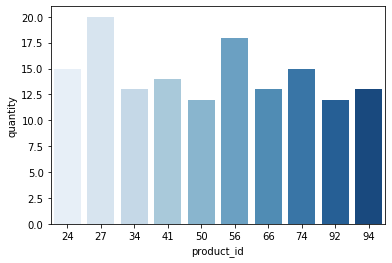

In [110]:
# Строю barplot:

sns.barplot(data=product_sales, x='product_id', y='quantity', palette='Blues' )

In [119]:
# Нахожу сколько товаров с id = 56 было продано:

product_sales.query('product_id == 56')

,product_id,quantity
42,56,18


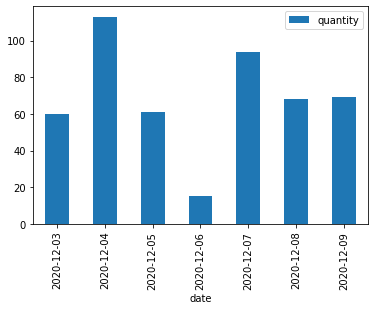

In [112]:
# Строю распределение продаж по дням и нахожу дни с минимальным и максимальным числом покупок:

df.groupby('date') \
    .agg({'quantity':'sum'}) \
    .plot(kind='bar')

In [134]:
# Нахожу сколько клиентов совершили повторные покупки в разные дни:

df.groupby(['name', 'product_id'], as_index=False) \
    .agg({'date':'nunique'}) \
    .rename(columns={'date': 'num_rep_days'}) \
    .query('num_rep_days > 1')

,name,product_id,num_rep_days
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
